<a href="https://colab.research.google.com/github/NeuroNautX/IDC409---Project/blob/main/Interactive_IDC_409_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMAGE PROCESSING - FACE RECOGNITION ATTENDANCE SYSTEM

###Team Members (Roll Numbers):
* Sarah Biju (MS23090)

* Tushti Govind (MS23144)

* Eshita Tandon (MS23163)


###Tools/ Libraries:
Python, OpenCV, NumPy, Pandas, Scikit-learn, Matplotlib, DeepFace, SQLite3, Joblib


###Dataset:
Labeled Faces in the Wild (LFW)


###Database:
SQLite


###Models/ Techniques:
Facenet, Principal Component Analysis (PCA), Support Vector Machine (SVM)



## Objective 1
- To build a dataset of 15–20 individuals (students) using the LFW dataset.
- To perform exploratory data analysis on number of images, image sizes, and sample visualization.


✅ Total people selected: 20
✅ Dataset saved in data/known_faces/


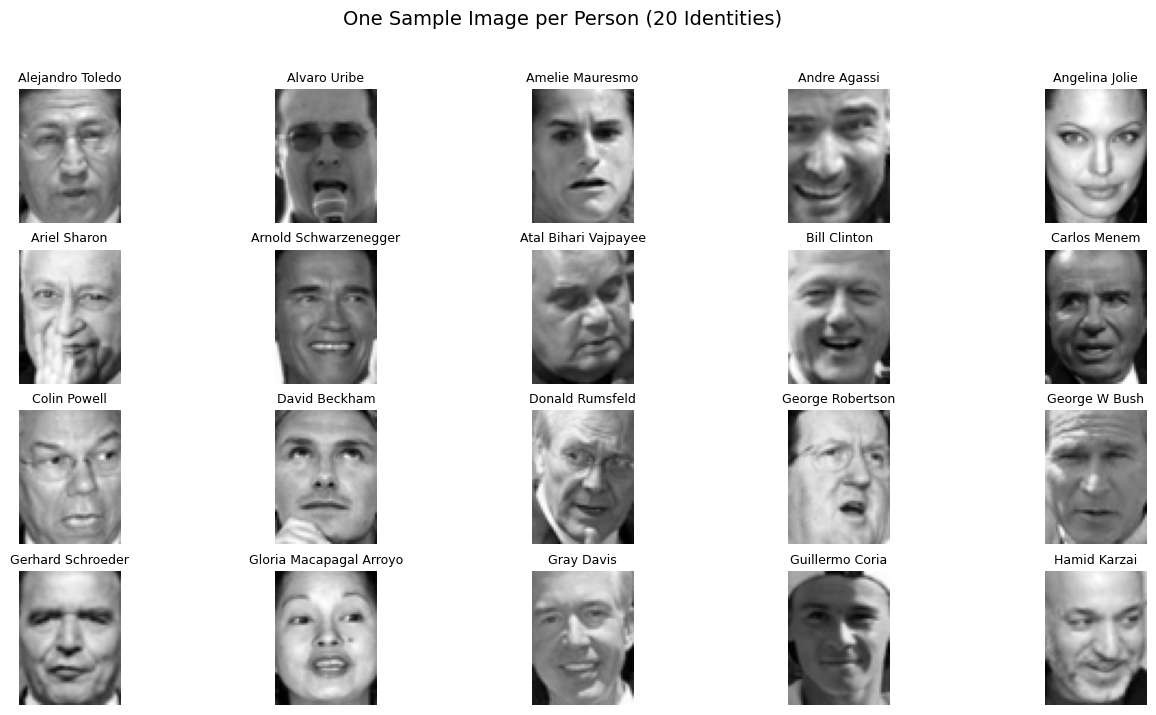


🧍 Showing all images of: Amelie Mauresmo (21 total)


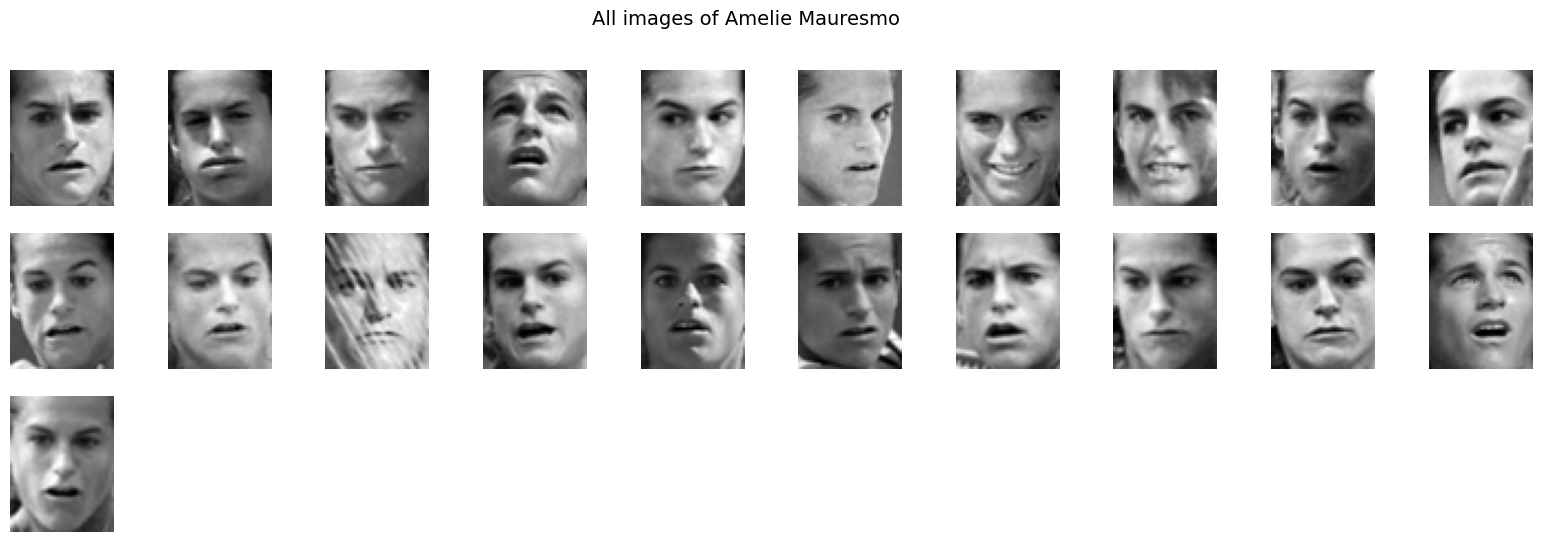

In [ ]:
# =======================================
# LFW Dataset Extraction + Visualization
# =======================================
from sklearn.datasets import fetch_lfw_people
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fetch LFW dataset (filtering by minimum 20 images/person)
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
X = lfw.images
y = lfw.target
names = lfw.target_names

# Step 2: Select first 20 identities
num_identities = 20
selected_indices = list(range(min(num_identities, len(names))))
selected_names = [names[i] for i in selected_indices]

print(f"✅ Total people selected: {len(selected_names)}")

# Step 3: Create folders and save up to 50 images per person
os.makedirs("data/known_faces", exist_ok=True)

for idx in selected_indices:
    name = names[idx].replace(" ", "_")
    person_dir = os.path.join("data/known_faces", name)
    os.makedirs(person_dir, exist_ok=True)

    im_idxs = [i for i, t in enumerate(y) if t == idx]
    for j, im_i in enumerate(im_idxs[:50]):
        img = (X[im_i] * 255).astype('uint8')
        img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        fname = os.path.join(person_dir, f"{name}_{j+1}.jpg")
        cv2.imwrite(fname, img_bgr)

print("✅ Dataset saved in data/known_faces/")

# Step 4: Show one sample image per person (overview)
plt.figure(figsize=(16, 8))
for i, idx in enumerate(selected_indices):
    plt.subplot(4, 5, i + 1)
    first_img = X[np.where(y == idx)[0][0]]
    plt.imshow(first_img, cmap='gray')
    plt.title(names[idx], fontsize=9)
    plt.axis('off')
plt.suptitle("One Sample Image per Person (20 Identities)", fontsize=14)
plt.show()

# Step 5: Show all images of one selected person (e.g., the 3rd person)
if len(selected_indices) > 2:
    person_index = selected_indices[2]
    person_name = names[person_index]
    person_images = X[np.where(y == person_index)[0]]
    print(f"\n🧍 Showing all images of: {person_name} ({len(person_images)} total)")
    cols = 10
    rows = int(np.ceil(len(person_images) / cols))
    plt.figure(figsize=(20, rows * 2))
    for i, img in enumerate(person_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(f"All images of {person_name}", fontsize=14)
    plt.show()




## Objective 2
- To encode the face images using a pre-trained model (DeepFace).
- To store the face encodings in a SQLite database for easy access.
- To perform dimensionality reduction on the face encodings using PCA.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.8 MB/s eta 0:00:00
25-10-29 07:38:03 - Directory /root/.deepface has been created
25-10-29 07:38:03 - Directory /root/.deepface/weights has been created
Encoding faces from dataset (DeepFace)...
25-10-29 07:38:08 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 47.2MB/s]


Encoded 692 faces from 20 people.
Encoding sample:
           0         1         2         3         4         5         6  \
0 -0.228806  0.336357  0.770727 -2.291984 -1.005705  0.609531  0.347676   
1 -2.577194 -0.945527  1.018863 -1.032288 -0.681962 -0.449385  0.885890   
2 -0.549521 -1.662250  1.939743 -1.900647 -0.436591  0.213129  0.698474   
3 -0.021738 -1.282262  1.492244 -1.751102 -0.225184  0.236062  0.895511   
4 -1.330019 -1.061523  1.838087 -1.411476  1.508516  0.021872  1.180348   

          7         8         9  ...       119       120       121       122  \
0 -0.911509  0.345497 -0.547541  ... -1.179697  0.516706  2.286181  1.843111   
1 -0.804196  0.248850 -0.869602  ...  1.698531  1.475010  2.059637 -0.950464   
2  0.160025  0.031189  0.014624  ... -0.641529  2.660090  1.429355  0.700638   
3 -0.763190  0.216583  0.312517  ...  1.968159  0.767224  2.515854 -0.292168   
4  0.372772  1.014498 -0.038798  ... -0.152497  1.653396  1.952958 -0.345201   

        123     

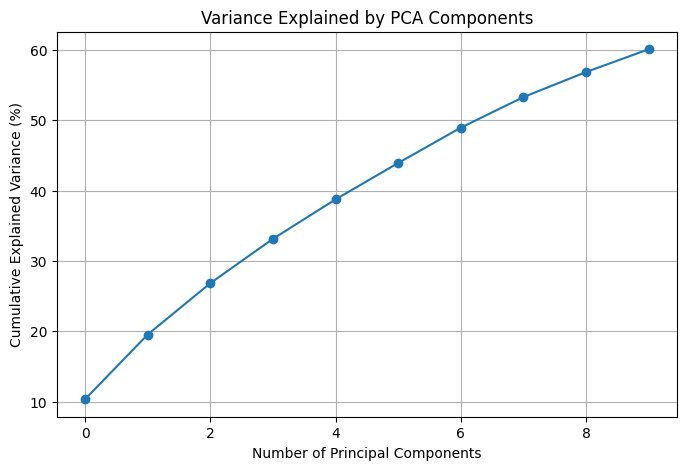

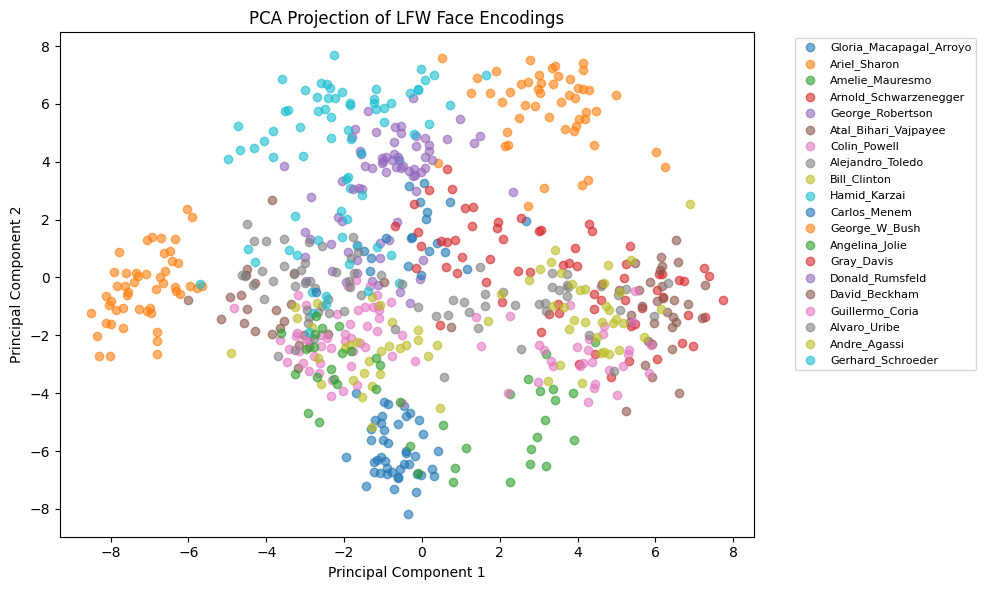

Database & PCA Analysis finished.


In [ ]:
# =========================================================
# Database Integration & Feature Analysis (using DeepFace)
# =========================================================

# Step 0: Environment setup
!pip install deepface --quiet
!pip install opencv-python pandas matplotlib scikit-learn --quiet

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU for simplicity

import cv2
import pandas as pd
import numpy as np
from deepface import DeepFace
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sqlite3
import joblib # Import joblib to save the PCA model

# Step 1: Encode all faces (from LFW dataset)
data_dir = "data/known_faces"
encodings, labels = [], []

print("Encoding faces from dataset (DeepFace)...")
for person_name in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person_name)
    if not os.path.isdir(person_path):
        continue
    for img_name in os.listdir(person_path):
        img_path = os.path.join(person_path, img_name)
        try:
            embedding = DeepFace.represent(img_path, model_name='Facenet', enforce_detection=False)[0]["embedding"]
            encodings.append(embedding)
            labels.append(person_name)
        except Exception as e:
            print(f"⚠️ Error reading {img_path}: {e}")

print(f"Encoded {len(encodings)} faces from {len(set(labels))} people.")

# Step 2: Create DataFrame
df = pd.DataFrame(encodings)
df["label"] = labels
print("Encoding sample:\n", df.head())

# Save CSV
df.to_csv("lfw_face_encodings.csv", index=False)
print("Saved encodings to lfw_face_encodings.csv")

# Step 3: Store in SQLite database
conn = sqlite3.connect("lfw_faces.db")
df.to_sql("faces_table", conn, if_exists="replace", index=False)
conn.commit()
conn.close()
print("Stored face encodings in lfw_faces.db")

# Step 4: Read back from DB (Optional: for verification)
# conn = sqlite3.connect("lfw_faces.db")
# df_db = pd.read_sql_query("SELECT * FROM faces_table", conn)
# conn.close()
# print(f"Loaded {df_db.shape[0]} rows and {df_db.shape[1]} columns from database.")


# Step 5: PCA (Feature Reduction)
X = df.drop(columns=["label"]).values
pca = PCA(n_components=10)
reduced = pca.fit_transform(X)
variance_ratio = np.round(pca.explained_variance_ratio_ * 100, 2)
print("Explained Variance Ratio (%):", variance_ratio)

# Save PCA model
pca_filename = "pca_model.pkl"
joblib.dump(pca, pca_filename)
print(f"Saved PCA model to {pca_filename}")


# Save reduced dataset
df_reduced = pd.DataFrame(reduced, columns=[f"PC{i+1}" for i in range(10)])
df_reduced["label"] = df["label"] # Use labels from original df
df_reduced.to_csv("lfw_faces_reduced.csv", index=False)
print("Saved PCA-reduced features to lfw_faces_reduced.csv")

# Step 6: Visualizations

# (A) Variance explained
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Variance Explained by PCA Components")
plt.grid(True)
plt.show()

# (B) 2D PCA scatter plot
plt.figure(figsize=(10,6))
unique_labels = df_reduced["label"].unique()
for person in unique_labels:
    data = df_reduced[df_reduced["label"] == person]
    plt.scatter(data["PC1"], data["PC2"], label=person, alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of LFW Face Encodings")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

print("Database & PCA Analysis finished.")


## Objective 3
- To train an SVM classifier on the face encodings to recognize individuals.

Dataset loaded: (692, 11)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.448362 -7.199098 -0.168677 -0.053881  4.258763  0.153921  1.199523   
1 -0.617888 -6.937255 -1.681807  3.036184  5.428920  0.505733  0.487817   
2 -0.769062 -6.727191  0.726662  2.200564  5.194467  1.143233 -0.964162   
3 -0.965942 -4.301802 -2.991105  3.460141  6.262324  1.058646 -1.382716   
4 -1.316322 -5.620167 -1.331694  1.848275  4.498979  0.751234 -1.356685   

        PC8       PC9      PC10                    label  
0 -3.124149  3.252491  0.819625  Gloria_Macapagal_Arroyo  
1 -2.261586 -0.256716 -0.402382  Gloria_Macapagal_Arroyo  
2 -1.596496 -0.440237  0.142495  Gloria_Macapagal_Arroyo  
3 -1.958299 -1.365008  0.263471  Gloria_Macapagal_Arroyo  
4 -1.154684  0.066351 -0.475008  Gloria_Macapagal_Arroyo  
Train size: (553, 10), Test size: (139, 10)
Training SVM classifier...
 Saved trained SVM model to svm_128D_model.pkl
 Model Accuracy: 97.12%


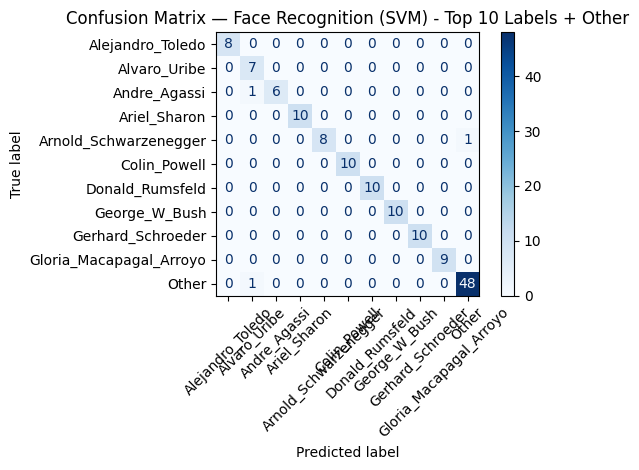

In [ ]:


# =============================================
# Model Training & Prediction (SVM Classifier)
# =============================================

# Step 0: Imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib # Import joblib to save the model

# Step 1: Load Encoded Dataset
# You can choose either the full encoding or the PCA-reduced one
df = pd.read_csv("lfw_faces_reduced.csv")  # or "lfw_face_encodings.csv" if you skipped PCA

print("Dataset loaded:", df.shape)
print(df.head())

# Step 2: Prepare Features and Labels
X = df.drop(columns=["label"]).values
y = df["label"].values

# Split into training and testing sets (80 % / 20 %)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

# Step 3: Train SVM Model
print("Training SVM classifier...")
model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)

# Step 3a: Save the trained model
model_filename = "svm_128D_model.pkl" # Naming convention: svm_DimensionsOfFeatures_model.pkl
joblib.dump(model, model_filename)
print(f" Saved trained SVM model to {model_filename}")


# Step 4: Predictions & Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy*100:.2f}%")

# Step 5: Confusion Matrix
# Select top N labels for clearer visualization
top_n = 10
label_counts = pd.Series(y_test).value_counts()
top_labels = label_counts.nlargest(top_n).index.tolist()

# Map labels to 'Other' if not in top_labels
y_test_filtered = [label if label in top_labels else 'Other' for label in y_test]
y_pred_filtered = [label if label in top_labels else 'Other' for label in y_pred]

# Get unique labels from the filtered lists
unique_filtered_labels = sorted(list(set(y_test_filtered + y_pred_filtered)))

cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=unique_filtered_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_filtered_labels)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title(f"Confusion Matrix — Face Recognition (SVM) - Top {top_n} Labels + Other")
plt.tight_layout()
plt.show()

## Integrated System
### Objective 4: Interactive System
- To develop a basic attendance system that recognizes faces from new images and logs attendance.
###Objective 5: Analytic Tests
- ROC Curve Analysis
- F1 Score Calculation
- Cohen's Kappa score calculation
### Objective 6: Integration with Webcam


In [ ]:
# ======================================================
# INTERACTIVE FACE RECOGNITION ATTENDANCE SYSTEM
# ======================================================
# Works in Google Colab
# Menu-driven interface with all analytics

from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from google.colab import files as colab_files
from base64 import b64decode
import cv2
import numpy as np
import PIL
import io
import time
import datetime
import pandas as pd
import os
from deepface import DeepFace
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
                             f1_score, cohen_kappa_score, classification_report,
                             roc_curve, auc)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# ======================================================
# CONFIGURATION
# ======================================================
CONFIDENCE_THRESHOLD = 0.3
ATTENDANCE_COOLDOWN = 3600  # 1 hour
session_id = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
attendance_file = f"attendance_{session_id}.csv"
last_attendance_time = {}

# ======================================================
# STEP 1: CHECK & LOAD MODELS
# ======================================================
def initialize_system():
    """Load models and check prerequisites"""
    print("\n" + "="*60)
    print("FACE RECOGNITION ATTENDANCE SYSTEM")
    print("="*60)
    print("Team: Sarah Biju, Tushti Govind, Eshita Tandon")
    print(f"Session ID: {session_id}")
    print("="*60 + "\n")

    # Check files
    required_files = {
        "svm_128D_model.pkl": "SVM Model",
        "pca_model.pkl": "PCA Model",
        "lfw_faces_reduced.csv": "Reduced Dataset",
        "data/known_faces": "Face Dataset Folder"
    }

    print("Checking prerequisites...")
    all_exist = True

    for file_path, description in required_files.items():
        if os.path.exists(file_path):
            print(f"  [OK] {description}")
        else:
            print(f"  [MISSING] {description}")
            all_exist = False

    if not all_exist:
        print("\nSETUP REQUIRED!")
        print("Please run Objectives 1-3 first, then restart this cell.")
        return None, None

    # Load models
    print("\nLoading models...")
    try:
        model = joblib.load("svm_128D_model.pkl")
        pca_model = joblib.load("pca_model.pkl")
        print(f"Models loaded successfully!")
        print(f"   - {len(model.classes_)} classes recognized")
        print(f"   - {pca_model.n_components_} PCA components")
        return model, pca_model
    except Exception as e:
        print(f"Error loading models: {e}")
        return None, None

# ======================================================
# STEP 2: ATTENDANCE MANAGEMENT
# ======================================================
def mark_attendance(name):
    """Mark attendance with cooldown and duplicate check"""
    global last_attendance_time

    now = datetime.datetime.now()
    current_time = time.time()

    # Check if already marked (except Unidentified)
    if os.path.exists(attendance_file):
        df_attendance = pd.read_csv(attendance_file)
        if name != "Unidentified" and name in df_attendance["Name"].values:
            print(f"  [SKIP] {name} already marked today")
            return False

    # Check cooldown
    if name in last_attendance_time and (current_time - last_attendance_time[name]) < ATTENDANCE_COOLDOWN:
        print(f"  [SKIP] {name} marked recently (cooldown active)")
        return False

    # Create entry
    entry = {
        'Name': name,
        'Date': now.date(),
        'Time': now.strftime("%H:%M:%S"),
        'Session': session_id
    }
    df_entry = pd.DataFrame([entry])

    # Append to CSV
    if not os.path.exists(attendance_file):
        df_entry.to_csv(attendance_file, mode="w", header=True, index=False)
    else:
        df_entry.to_csv(attendance_file, mode="a", header=False, index=False)

    if name not in ["Unidentified", "Error"]:
        print(f"  [MARKED] {name} at {entry['Time']}")
        last_attendance_time[name] = current_time
    else:
        print(f"  [LOGGED] {name} at {entry['Time']}")

    return True

# ======================================================
# STEP 3: FACE RECOGNITION
# ======================================================
def recognize_face(img_path, model, pca_model):
    """Recognize face with PCA transformation"""
    try:
        # Extract embedding
        embedding = DeepFace.represent(
            img_path=img_path,
            model_name="Facenet",
            enforce_detection=False,
            detector_backend="opencv"
        )[0]["embedding"]

        # Transform and predict
        test_emb = np.array(embedding).reshape(1, -1)
        test_emb_reduced = pca_model.transform(test_emb)

        probabilities = model.predict_proba(test_emb_reduced)[0]
        max_prob_index = np.argmax(probabilities)
        max_probability = probabilities[max_prob_index]
        predicted_name = model.classes_[max_prob_index]

        if max_probability >= CONFIDENCE_THRESHOLD:
            return predicted_name, max_probability
        else:
            return "Unidentified", max_probability

    except Exception as e:
        print(f"  Recognition error: {e}")
        return "Error", 0.0

# ======================================================
# STEP 4: WEBCAM CAPTURE
# ======================================================
def capture_photo():
    """Capture photo from webcam"""
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture Photo';
            capture.style.cssText = 'padding:10px 20px; font-size:16px; background:#4CAF50; color:white; border:none; border-radius:5px; cursor:pointer; margin:10px 0;';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.cssText = 'display:block; border:3px solid #4CAF50; border-radius:10px; margin-top:10px;';

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')

    display(js)
    data = eval_js('takePhoto({})'.format(0.8))
    binary = b64decode(data.split(',')[1])

    timestamp = datetime.datetime.now().strftime("%H%M%S")
    img_path = f'webcam_{timestamp}.jpg'
    with open(img_path, 'wb') as f:
        f.write(binary)

    return img_path

# ======================================================
# FEATURE 1: WEBCAM ATTENDANCE MODE
# ======================================================
def webcam_attendance_mode(model, pca_model):
    """Interactive webcam attendance"""
    print("\n" + "="*60)
    print("WEBCAM ATTENDANCE MODE")
    print("="*60)

    while True:
        print("\nOptions:")
        print("  1. Capture and recognize face")
        print("  2. Back to main menu")

        choice = input("\nEnter choice (1-2): ").strip()

        if choice == '1':
            try:
                # Capture photo
                img_path = capture_photo()
                print(f"  Photo captured!")

                # Display
                img = PIL.Image.open(img_path)
                img.thumbnail((400, 400))
                display(img)

                # Recognize
                name, confidence = recognize_face(img_path, model, pca_model)

                if name == "Error":
                    print("  Could not process image")
                    mark_attendance("Error")
                elif name == "Unidentified":
                    print(f"  Unidentified (Confidence: {confidence:.2%})")
                    manual_name = input("  Enter person's name (or 'skip'): ").strip()
                    if manual_name.lower() not in ['skip', '']:
                        mark_attendance(manual_name.replace(" ", "_"))
                    else:
                        mark_attendance("Unidentified")
                else:
                    print(f"  Recognized: {name} (Confidence: {confidence:.2%})")
                    mark_attendance(name)

                # Cleanup
                if os.path.exists(img_path):
                    os.remove(img_path)

            except Exception as e:
                print(f"  Error: {e}")

        elif choice == '2':
            break
        else:
            print("  Invalid choice")

# ======================================================
# FEATURE 2: UPLOAD IMAGE MODE
# ======================================================
def upload_image_mode(model, pca_model):
    """Upload and process images"""
    print("\n" + "="*60)
    print("UPLOAD IMAGE MODE")
    print("="*60)
    print("Select images to upload...")

    uploaded = colab_files.upload()

    if not uploaded:
        print("  No files uploaded")
        return

    print(f"\nProcessing {len(uploaded)} image(s)...\n")

    for img_name, img_data in uploaded.items():
        print(f"\n{'='*50}")
        print(f"Processing: {img_name}")
        print('='*50)

        # Save file
        with open(img_name, 'wb') as f:
            f.write(img_data)

        try:
            # Display
            img = PIL.Image.open(img_name)
            img.thumbnail((300, 300))
            display(img)

            # Recognize
            name, confidence = recognize_face(img_name, model, pca_model)

            if name == "Error":
                print("  Could not process image")
                mark_attendance("Error")
            elif name == "Unidentified":
                print(f"  Unidentified (Confidence: {confidence:.2%})")
                manual_name = input("  Enter person's name (or 'skip'): ").strip()
                if manual_name.lower() not in ['skip', '']:
                    mark_attendance(manual_name.replace(" ", "_"))
                else:
                    mark_attendance("Unidentified")
            else:
                print(f"  Recognized: {name} (Confidence: {confidence:.2%})")
                mark_attendance(name)

        except Exception as e:
            print(f"  Error: {e}")
        finally:
            if os.path.exists(img_name):
                os.remove(img_name)

    print("\nAll images processed!")
    input("\nPress Enter to continue...")

# ======================================================
# FEATURE 3: VIEW ATTENDANCE
# ======================================================
def view_attendance():
    """Display attendance records"""
    print("\n" + "="*60)
    print("ATTENDANCE RECORDS")
    print("="*60)

    if not os.path.exists(attendance_file):
        print("  No attendance records found")
        input("\nPress Enter to continue...")
        return

    df = pd.read_csv(attendance_file)

    if df.empty:
        print("  No records yet")
    else:
        display(df)

        print(f"\nSummary:")
        print(f"  - Total entries: {len(df)}")
        print(f"  - Unique individuals: {df['Name'].nunique()}")

        # Chart
        plt.figure(figsize=(10, 5))
        df["Name"].value_counts().plot(kind="bar", color="lightgreen")
        plt.title("Attendance Frequency")
        plt.xlabel("Name")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    input("\nPress Enter to continue...")

# ======================================================
# FEATURE 4: PROCESSING DETAILS
# ======================================================
def show_processing_details(model, pca_model):
    """Show technical analysis"""

    while True:
        print("\n" + "="*60)
        print("PROCESSING DETAILS")
        print("="*60)
        print("  1. PCA Analysis")
        print("  2. SVM Model Details")
        print("  3. Confusion Matrix")
        print("  4. Accuracy Metrics (F1, Kappa)")
        print("  5. ROC Curve Analysis")
        print("  6. Back to Main Menu")

        choice = input("\nEnter choice (1-6): ").strip()

        if choice == '1':
            show_pca_analysis(pca_model)
        elif choice == '2':
            show_svm_details(model)
        elif choice == '3':
            show_confusion_matrix(model)
        elif choice == '4':
            show_accuracy_metrics(model)
        elif choice == '5':
            show_roc_curve_analysis(model)
        elif choice == '6':
            break
        else:
            print("  Invalid choice")

def show_pca_analysis(pca_model):
    """Display PCA details"""
    print("\n" + "-"*60)
    print("PCA ANALYSIS")
    print("-"*60)

    variance_ratio = pca_model.explained_variance_ratio_ * 100
    cumulative_variance = np.cumsum(variance_ratio)

    print(f"\nReduction: 128D -> {pca_model.n_components_}D")
    print(f"Total variance: {cumulative_variance[-1]:.2f}%\n")

    # Table
    pca_df = pd.DataFrame({
        'Component': [f'PC{i+1}' for i in range(len(variance_ratio))],
        'Variance (%)': np.round(variance_ratio, 2),
        'Cumulative (%)': np.round(cumulative_variance, 2)
    })
    display(pca_df)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].bar(range(1, len(variance_ratio)+1), variance_ratio, color='skyblue')
    axes[0].set_xlabel('Principal Component')
    axes[0].set_ylabel('Variance Explained (%)')
    axes[0].set_title('Variance by PC')
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance,
                 marker='o', linewidth=2, color='green')
    axes[1].set_xlabel('Number of Components')
    axes[1].set_ylabel('Cumulative Variance (%)')
    axes[1].set_title('Cumulative Variance')
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=90, color='r', linestyle='--', label='90%')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    input("\nPress Enter to continue...")

def show_svm_details(model):
    """Display SVM info"""
    print("\n" + "-"*60)
    print("SVM MODEL DETAILS")
    print("-"*60)

    print(f"\nKernel: {model.kernel}")
    print(f"Classes: {len(model.classes_)}")
    print(f"Support Vectors: {model.n_support_.sum()}")
    print(f"Confidence Threshold: {CONFIDENCE_THRESHOLD:.2%}")

    print("\nRecognized Classes:")
    for i, name in enumerate(model.classes_, 1):
        print(f"  {i:2d}. {name}")

    input("\nPress Enter to continue...")

def show_confusion_matrix(model):
    """Display enhanced confusion matrix with better visualization"""
    print("\n" + "-"*60)
    print("CONFUSION MATRIX")
    print("-"*60)

    try:
        df = pd.read_csv("lfw_faces_reduced.csv")
        X = df.drop(columns=["label"]).values
        y = df["label"].values

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        y_pred = model.predict(X_test)

        # Option 1: Show ALL classes (if reasonable number)
        if len(model.classes_) <= 15:
            print(f"\nShowing confusion matrix for all {len(model.classes_)} classes\n")

            cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

            # Create figure with better size
            fig, ax = plt.subplots(figsize=(14, 12))

            # Use better colormap
            im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            ax.figure.colorbar(im, ax=ax)

            # Set ticks
            ax.set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   xticklabels=model.classes_,
                   yticklabels=model.classes_,
                   xlabel='Predicted Label',
                   ylabel='True Label',
                   title='Confusion Matrix - All Classes')

            # Rotate x labels for readability
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

            # Add text annotations with better formatting
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], 'd'),
                           ha="center", va="center",
                           color="white" if cm[i, j] > thresh else "black",
                           fontsize=9)

            fig.tight_layout()
            plt.show()

        else:
            # Option 2: Top classes only (for many classes)
            print("\nSelect visualization type:")
            print("  1. Top 10 classes (cleaner)")
            print("  2. Top 15 classes")
            print("  3. All classes (may be crowded)")

            viz_choice = input("\nEnter choice (1-3, default=1): ").strip()
            if viz_choice == '':
                viz_choice = '1'

            if viz_choice == '3':
                top_n = len(model.classes_)
            elif viz_choice == '2':
                top_n = 15
            else:
                top_n = 10

            # Get top N most frequent classes
            label_counts = pd.Series(y_test).value_counts()
            top_labels = label_counts.nlargest(top_n).index.tolist()

            # Filter predictions
            y_test_filtered = [label if label in top_labels else 'Other' for label in y_test]
            y_pred_filtered = [label if label in top_labels else 'Other' for label in y_pred]

            unique_labels = sorted(list(set(y_test_filtered + y_pred_filtered)))
            cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=unique_labels)

            # Create enhanced visualization
            fig, ax = plt.subplots(figsize=(16, 14))

            # Use better colormap with more contrast
            im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.BuPu)
            cbar = ax.figure.colorbar(im, ax=ax)
            cbar.ax.set_ylabel('Count', rotation=-90, va="bottom", fontsize=12)

            # Set ticks and labels
            ax.set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   xticklabels=unique_labels,
                   yticklabels=unique_labels)

            # Rotate and align labels
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                    rotation_mode="anchor", fontsize=11)
            plt.setp(ax.get_yticklabels(), fontsize=11)

            # Add labels
            ax.set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
            ax.set_ylabel('True Label', fontsize=13, fontweight='bold')
            ax.set_title(f'Confusion Matrix - Top {top_n} Classes + Other',
                        fontsize=15, fontweight='bold', pad=20)

            # Add text annotations with smart sizing
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    value = cm[i, j]
                    # Color: white on dark, black on light
                    text_color = "white" if value > thresh else "black"
                    # Font weight: bold for diagonal (correct predictions)
                    font_weight = 'bold' if i == j else 'normal'

                    ax.text(j, i, format(value, 'd'),
                           ha="center", va="center",
                           color=text_color,
                           fontsize=10,
                           fontweight=font_weight)

            # Add grid for better readability
            ax.set_xticks(np.arange(cm.shape[1]+1)-.5, minor=True)
            ax.set_yticks(np.arange(cm.shape[0]+1)-.5, minor=True)
            ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
            ax.tick_params(which="minor", size=0)

            fig.tight_layout()
            plt.show()

        # Print accuracy summary
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nOverall Accuracy: {accuracy*100:.2f}%")
        print(f"Total test samples: {len(y_test)}")
        print(f"Correct predictions: {(y_test == y_pred).sum()}")
        print(f"Incorrect predictions: {(y_test != y_pred).sum()}")

    except Exception as e:
        print(f"  Error: {e}")

    input("\nPress Enter to continue...")

def show_accuracy_metrics(model):
    """Display accuracy metrics including F1 and Cohen's Kappa"""
    print("\n" + "-"*60)
    print("ACCURACY METRICS (F1 SCORE & COHEN'S KAPPA)")
    print("-"*60)

    try:
        df = pd.read_csv("lfw_faces_reduced.csv")
        X = df.drop(columns=["label"]).values
        y = df["label"].values

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        kappa = cohen_kappa_score(y_test, y_pred)

        print(f"\nAccuracy: {accuracy*100:.2f}%")
        print(f"F1 Score (weighted): {f1:.4f}")
        print(f"Cohen's Kappa: {kappa:.4f}")
        print(f"Test samples: {len(y_test)}")
        print(f"Train samples: {len(y_train)}")

        print("\nClassification Report:")
        print("-"*60)
        print(classification_report(y_test, y_pred, zero_division=0))

    except Exception as e:
        print(f"  Error: {e}")

    input("\nPress Enter to continue...")

def show_roc_curve_analysis(model):
    """Display ROC curves for multi-class classification"""
    print("\n" + "-"*60)
    print("ROC CURVE ANALYSIS")
    print("-"*60)
    print("Generating ROC curves...")

    try:
        # Load the PCA-reduced dataset
        df_reduced = pd.read_csv("lfw_faces_reduced.csv")
        X = df_reduced.drop(columns=["label"]).values
        y = df_reduced["label"].values

        # Split data (same as training)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Train temporary model for ROC analysis (ensures probability=True)
        print("Training temporary model for ROC analysis...")
        temp_model = model  # Use existing model if it has probability=True

        # Check if model has predict_proba
        if not hasattr(model, 'predict_proba'):
            print("Retraining model with probability=True...")
            from sklearn.svm import SVC
            temp_model = SVC(kernel="linear", probability=True)
            temp_model.fit(X_train, y_train)

        # Binarize the output labels for multi-class ROC
        classes = temp_model.classes_
        y_test_bin = label_binarize(y_test, classes=classes)
        n_classes = y_test_bin.shape[1]

        # Get probability estimates
        y_pred_proba = temp_model.predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves
        plt.figure(figsize=(12, 10))
        colors = plt.cm.get_cmap('tab20', n_classes)

        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
                     label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

        # Diagonal line (random classifier)
        plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
        plt.legend(loc="lower right", fontsize=8, ncol=2)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print(f"\nROC AUC Summary:")
        print(f"Mean AUC: {np.mean(list(roc_auc.values())):.4f}")
        print(f"Min AUC: {np.min(list(roc_auc.values())):.4f}")
        print(f"Max AUC: {np.max(list(roc_auc.values())):.4f}")

        print("\nROC curve analysis complete.")

    except FileNotFoundError:
        print("Error: 'lfw_faces_reduced.csv' not found.")
        print("Please ensure Objective 2 (PCA reduction) was run successfully.")
    except AttributeError:
        print("Error: Could not get probability estimates.")
        print("Model may not support probability predictions.")
    except Exception as e:
        print(f"Unexpected error: {e}")

    input("\nPress Enter to continue...")

# ======================================================
# FEATURE 5: GENERATE REPORT
# ======================================================
def generate_report():
    """Generate and download report"""
    print("\n" + "="*60)
    print("GENERATE REPORT")
    print("="*60)

    if not os.path.exists(attendance_file):
        print("  No attendance records found")
        input("\nPress Enter to continue...")
        return

    df = pd.read_csv(attendance_file)

    # Generate text report
    report_filename = f"report_{session_id}.txt"

    with open(report_filename, 'w') as f:
        f.write("="*60 + "\n")
        f.write("FACE RECOGNITION ATTENDANCE - SESSION REPORT\n")
        f.write("="*60 + "\n\n")
        f.write(f"Session ID: {session_id}\n")
        f.write(f"Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        f.write(f"Total Entries: {len(df)}\n")
        f.write(f"Unique Individuals: {df['Name'].nunique()}\n\n")
        f.write("="*60 + "\n")
        f.write("ATTENDANCE RECORDS\n")
        f.write("="*60 + "\n\n")
        f.write(df.to_string(index=False))
        f.write("\n\n")
        f.write("="*60 + "\n")
        f.write("FREQUENCY\n")
        f.write("="*60 + "\n\n")
        f.write(df['Name'].value_counts().to_string())
        f.write("\n\n")
        f.write("="*60 + "\n")

    print(f"  Report generated: {report_filename}")
    print("  Downloading files...")

    colab_files.download(attendance_file)
    colab_files.download(report_filename)

    print("  Download complete!")
    input("\nPress Enter to continue...")

# ======================================================
# MAIN MENU
# ======================================================
def main_menu(model, pca_model):
    """Main menu loop"""

    while True:
        print("\n" + "="*60)
        print("MAIN MENU")
        print("="*60)
        print("  1. Webcam Attendance")
        print("  2. Upload Images")
        print("  3. View Attendance")
        print("  4. Processing Details (PCA/SVM/ROC/Metrics)")
        print("  5. Generate Report")
        print("  6. Exit")
        print("="*60)

        choice = input("\nEnter choice (1-6): ").strip()

        if choice == '1':
            webcam_attendance_mode(model, pca_model)
        elif choice == '2':
            upload_image_mode(model, pca_model)
        elif choice == '3':
            view_attendance()
        elif choice == '4':
            show_processing_details(model, pca_model)
        elif choice == '5':
            generate_report()
        elif choice == '6':
            print("\nThank you for using the system!")
            print("="*60)
            break
        else:
            print("  Invalid choice. Try again.")




FACE RECOGNITION ATTENDANCE SYSTEM
Team: Sarah Biju, Tushti Govind, Eshita Tandon
Session ID: 20251029_074346

Checking prerequisites...
  [OK] SVM Model
  [OK] PCA Model
  [OK] Reduced Dataset
  [OK] Face Dataset Folder

Loading models...
Models loaded successfully!
   - 20 classes recognized
   - 10 PCA components

System ready!

MAIN MENU
  1. Webcam Attendance
  2. Upload Images
  3. View Attendance
  4. Processing Details (PCA/SVM/ROC/Metrics)
  5. Generate Report
  6. Exit

Enter choice (1-6): 1

WEBCAM ATTENDANCE MODE

Options:
  1. Capture and recognize face
  2. Back to main menu

Enter choice (1-2): 1


<IPython.core.display.Javascript object>

  Photo captured!


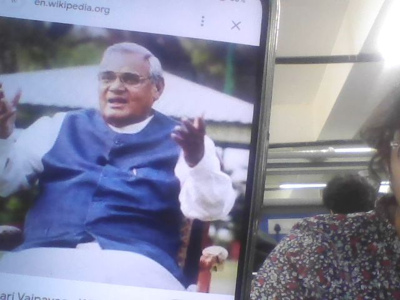

  Recognized: Atal_Bihari_Vajpayee (Confidence: 30.31%)
  [MARKED] Atal_Bihari_Vajpayee at 07:44:36

Options:
  1. Capture and recognize face
  2. Back to main menu

Enter choice (1-2): 2

MAIN MENU
  1. Webcam Attendance
  2. Upload Images
  3. View Attendance
  4. Processing Details (PCA/SVM/ROC/Metrics)
  5. Generate Report
  6. Exit

Enter choice (1-6): 2

UPLOAD IMAGE MODE
Select images to upload...


Saving Screenshot 2025-10-28 163058.png to Screenshot 2025-10-28 163058.png

Processing 1 image(s)...


Processing: Screenshot 2025-10-28 163058.png


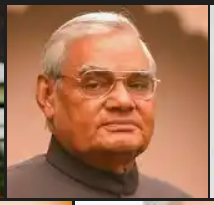

  Recognized: Atal_Bihari_Vajpayee (Confidence: 72.11%)
  [SKIP] Atal_Bihari_Vajpayee already marked today

All images processed!

Press Enter to continue...

MAIN MENU
  1. Webcam Attendance
  2. Upload Images
  3. View Attendance
  4. Processing Details (PCA/SVM/ROC/Metrics)
  5. Generate Report
  6. Exit

Enter choice (1-6): 3

ATTENDANCE RECORDS


,Name,Date,Time,Session
0,Atal_Bihari_Vajpayee,2025-10-29,07:44:36,20251029_074346



Summary:
  - Total entries: 1
  - Unique individuals: 1


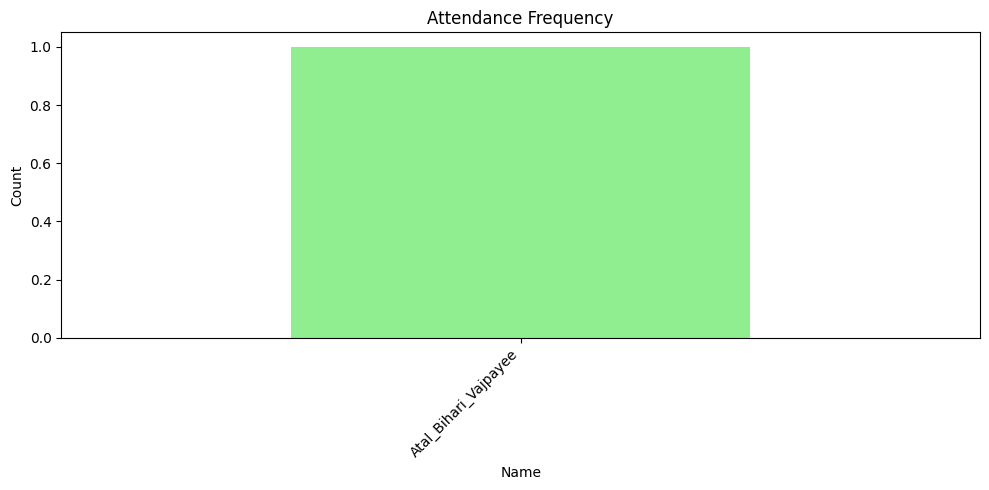


Press Enter to continue...

MAIN MENU
  1. Webcam Attendance
  2. Upload Images
  3. View Attendance
  4. Processing Details (PCA/SVM/ROC/Metrics)
  5. Generate Report
  6. Exit

Enter choice (1-6): 4

PROCESSING DETAILS
  1. PCA Analysis
  2. SVM Model Details
  3. Confusion Matrix
  4. Accuracy Metrics (F1, Kappa)
  5. ROC Curve Analysis
  6. Back to Main Menu

Enter choice (1-6): 4

------------------------------------------------------------
ACCURACY METRICS (F1 SCORE & COHEN'S KAPPA)
------------------------------------------------------------

Accuracy: 97.12%
F1 Score (weighted): 0.9723
Cohen's Kappa: 0.9695
Test samples: 139
Train samples: 553

Classification Report:
------------------------------------------------------------
                         precision    recall  f1-score   support

       Alejandro_Toledo       1.00      1.00      1.00         8
           Alvaro_Uribe       0.78      1.00      0.88         7
        Amelie_Mauresmo       1.00      1.00      1.00    

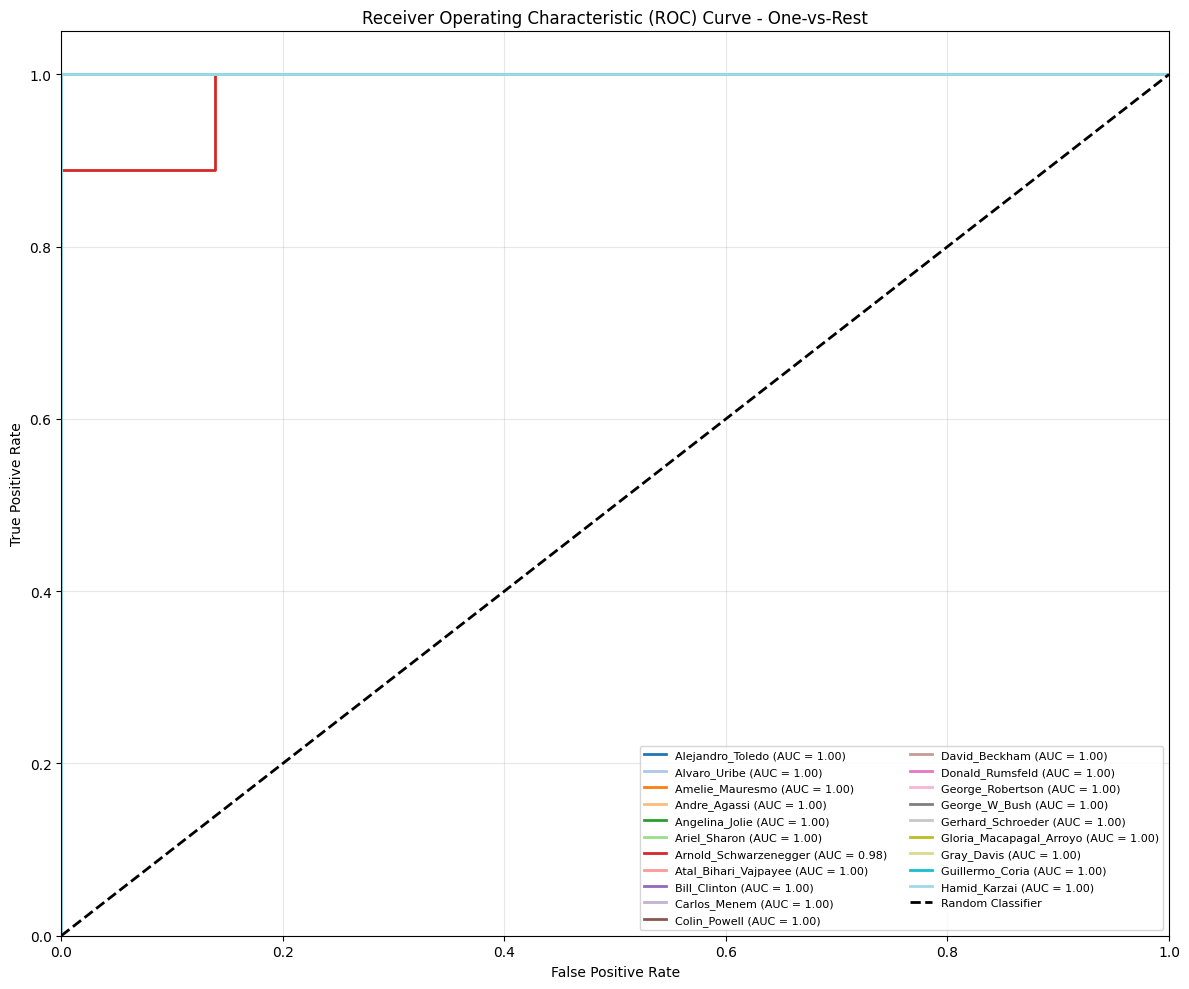


ROC AUC Summary:
Mean AUC: 0.9992
Min AUC: 0.9846
Max AUC: 1.0000

ROC curve analysis complete.

Press Enter to continue...

PROCESSING DETAILS
  1. PCA Analysis
  2. SVM Model Details
  3. Confusion Matrix
  4. Accuracy Metrics (F1, Kappa)
  5. ROC Curve Analysis
  6. Back to Main Menu

Enter choice (1-6): 6

MAIN MENU
  1. Webcam Attendance
  2. Upload Images
  3. View Attendance
  4. Processing Details (PCA/SVM/ROC/Metrics)
  5. Generate Report
  6. Exit

Enter choice (1-6): 6

Thank you for using the system!


In [ ]:
# ======================================================
# START SYSTEM
# ======================================================
model, pca_model = initialize_system()

if model is not None and pca_model is not None:
    print("\nSystem ready!")
    main_menu(model, pca_model)
else:
    print("\nSystem initialization failed!")
    print("Please run Objectives 1-3 first.")
